In [51]:
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
snowpack_df = pd.read_csv("state_of_utah_SWE.csv")

In [54]:
snowpack_df.head()

,date,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2023,Min,10%,30%,70%,90%,Max,Median ('91-'20),Median (POR),Median Peak SWE
0,1-Oct,0.0,0.0,1.4,0.0,0.1,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,1.4,0.0,0.0,15.8
1,2-Oct,0.0,0.0,1.4,0.1,0.1,0.0,1.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,1.4,0.0,0.0,15.8
2,3-Oct,0.0,0.0,1.3,0.2,0.1,0.0,1.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,1.5,0.0,0.0,15.8
3,4-Oct,0.0,0.1,1.3,0.2,0.1,0.0,1.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,1.5,0.0,0.0,15.8
4,5-Oct,0.0,0.1,1.2,0.1,0.0,0.0,1.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.3,1.4,0.0,0.0,15.8


<AxesSubplot:>

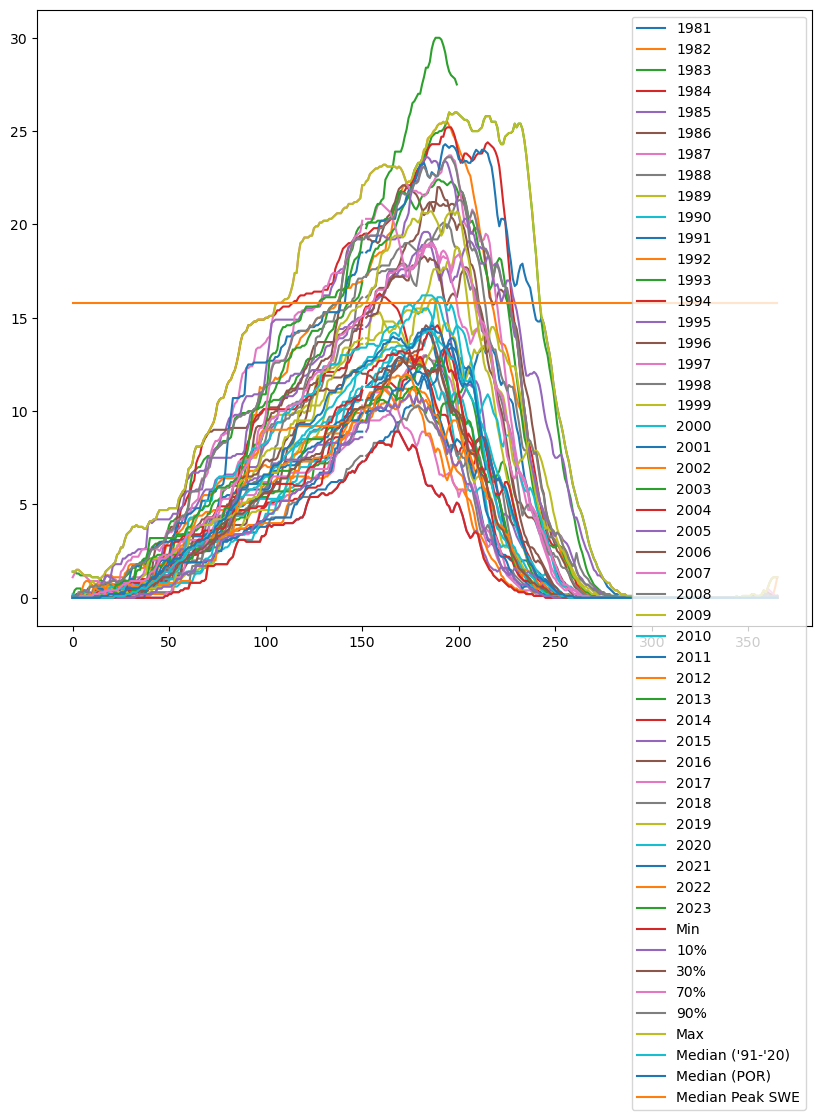

In [55]:
snowpack_df.plot(figsize=(10,8))

In [56]:
snowpack_data_df = snowpack_df[["date","1983", "2011", "2023", "Median ('91-'20)"]].copy()
snowpack_data_df = snowpack_data_df.set_index("date")
snowpack_data_df.head()

,1983,2011,2023,Median ('91-'20)
date,,,,
1-Oct,1.4,0.0,0.0,0.0
2-Oct,1.4,0.0,0.0,0.0
3-Oct,1.3,0.0,0.0,0.0
4-Oct,1.3,0.0,0.0,0.0
5-Oct,1.2,0.0,0.0,0.0


In [57]:
snowpack_data_df.to_csv('snowpack_date.csv')

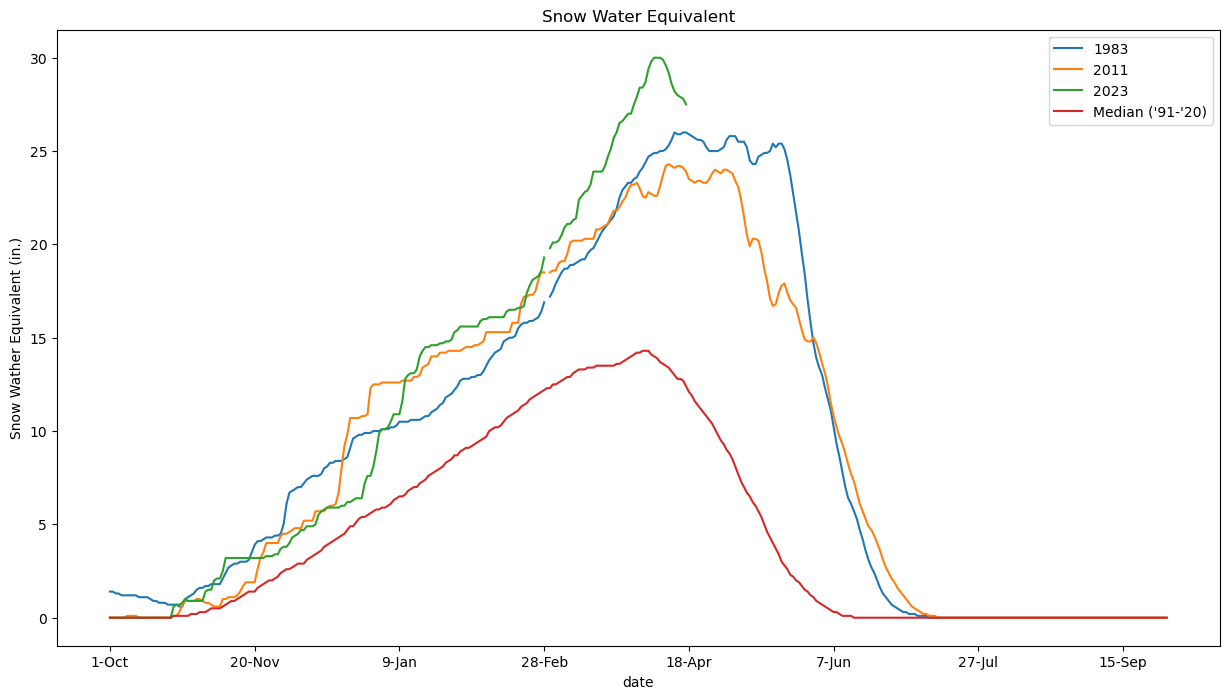

In [58]:
snowpack_data_df.plot(figsize=(15,8))
plt.xlabel("date")
plt.ylabel("Snow Wather Equivalent (in.)")
plt.title("Snow Water Equivalent")

plt.show()

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
import pandas as pd
Weber_df = pd.read_csv("Weather data/Weber_Weather_Data1.csv")
Weber_df.head()


,Date,Causey Reservoir (10137290) % of Reservoir Capacity Start of Day Values,Pineview Reservoir (10139000) % of Reservoir Capacity Start of Day Values,Weber SWE,Unnamed: 4,Flood,Ben Lomond Peak (332) Snow Water Equivalent (in) Start of Day Values,Ben Lomond Trail (333) Snow Water Equivalent (in) Start of Day Values,Lightning Ridge (1056) Snow Water Equivalent (in) Start of Day Values,UTAH SWE,...,OgdenRain_sum (inch),OgdenSnowfall_sum (inch),OgdenWindspeed_10m_max (mp/h),hooperTemp_Max (°F),hooperTemp_min (°F),hooperTemp_mean (°F),hooperPrecipitation_sum (inch),hooperRain_sum (inch),hooperSnowfall_sum (inch),hooperWindspeed_10m_max (mp/h)
0,10/1/1982,56,70,63.0,No,0,2.5,1.0,NaN,1.4,...,0.387,0.0,10.8,49.5,44.0,46.7,0.239,0.239,0.0,14.0
1,10/2/1982,56,70,63.0,No,0,3.1,1.0,NaN,1.4,...,0.000,0.0,8.2,56.3,44.0,50.7,0.000,0.000,0.0,9.3
2,10/3/1982,56,70,63.0,No,0,2.9,0.9,NaN,1.3,...,0.000,0.0,5.1,57.4,44.9,51.5,0.000,0.000,0.0,5.2
3,10/4/1982,56,70,63.0,No,0,2.7,0.6,NaN,1.3,...,0.056,0.0,8.9,62.2,48.9,55.3,0.036,0.036,0.0,11.6
4,10/5/1982,44,70,57.0,No,0,2.5,0.2,NaN,1.2,...,0.115,0.0,8.1,50.0,43.8,47.4,0.084,0.084,0.0,11.9


In [36]:
Weber_drop_df = Weber_df.dropna()

In [37]:
y = Weber_drop_df["Flood"]
X = Weber_drop_df.drop(columns=["Flood", "Date", "Unnamed: 4"])
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(5122, 21)

In [38]:
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [39]:
classifier.fit(X_train, y_train)

c:\Users\socce\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=200, random_state=1)

In [40]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9607728337236534


In [50]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9621241702459976
Testing Data Score: 0.9607728337236534
